In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#from acquire import get_telco_data
#from prepare import telco_prep
import acquire
import explore
import prepare

# Acquire

In [2]:
# Acquiring the data, checking out the shape and the first five rows

df = acquire.get_telco_data()
print(df.shape)
df.head()

(7043, 24)


,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,1,1,2,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Mailed check,Month-to-month,DSL
1,1,1,4,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Credit card (automatic),Month-to-month,DSL
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Electronic check,Month-to-month,DSL
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Electronic check,Month-to-month,DSL
4,1,1,3,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Bank transfer (automatic),Month-to-month,DSL


In [3]:
# Inspect values and dtypes

# for col in df.columns:
#     print(col)
#     print(df[col].value_counts(dropna=False))
#     print('----------')

## Acquire Takeaways

- After examining the values and data types of the data I acquired, I want to do the following in prepare:

    - Convert 'online_security','online_backup', 'device_protection', 'tech_support' from `yes` and `no` values to 1 and 0.
    
    - I'm going to drop `total_charges` because it is calculated from `monthly_charges` and `tenure_months`.
    
    - I'm going to drop `customer_id`.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
internet_service_type_id    7043 non-null int64
contract_type_id            7043 non-null int64
payment_type_id             7043 non-null int64
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
paperless_billing           7043 non-null object
monthly_charges 

In [5]:
df.nunique()

internet_service_type_id       3
contract_type_id               3
payment_type_id                4
customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
paperless_billing              2
monthly_charges             1585
total_charges               6531
churn                          2
payment_type                   4
contract_type                  3
internet_service_type          3
dtype: int64

In [6]:
df.describe(include='all')

,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
count,7043.000000,7043.000000,7043.000000,7043,7043,7043.000000,7043,7043,7043.000000,7043,...,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043
unique,NaN,NaN,NaN,7043,2,NaN,2,2,NaN,2,...,3,3,3,2,NaN,6531,2,4,3,3
top,NaN,NaN,NaN,3853-LYGAM,Male,NaN,No,No,NaN,Yes,...,No,No,No,Yes,NaN,20.2,No,Electronic check,Month-to-month,Fiber optic
freq,NaN,NaN,NaN,1,3555,NaN,3641,4933,NaN,6361,...,3473,2810,2785,4171,NaN,11,5174,2365,3875,3096
mean,1.872923,1.690473,2.315633,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,...,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,NaN,NaN,NaN
std,0.737796,0.833755,1.148907,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,...,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,NaN,NaN,NaN
25%,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,...,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,NaN,NaN,NaN
50%,2.000000,1.000000,2.000000,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,...,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,NaN,NaN,NaN
75%,2.000000,2.000000,3.000000,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,...,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,NaN,NaN,NaN


In [7]:
# Print a concise summary of our telco df - the column dtypes, non-null values
df.head()

,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,1,1,2,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Mailed check,Month-to-month,DSL
1,1,1,4,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Credit card (automatic),Month-to-month,DSL
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Electronic check,Month-to-month,DSL
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Electronic check,Month-to-month,DSL
4,1,1,3,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Bank transfer (automatic),Month-to-month,DSL


In [8]:
#pd.get_dummies(df, columns=['internet_service_type_id', 'online_security', 'tech_support'], drop_first=[True, True, True])

In [9]:
#pd.get_dummies(df[['internet_service_type_id', 'online_security', 'tech_support']], prefix='d', drop_first=[True, True])

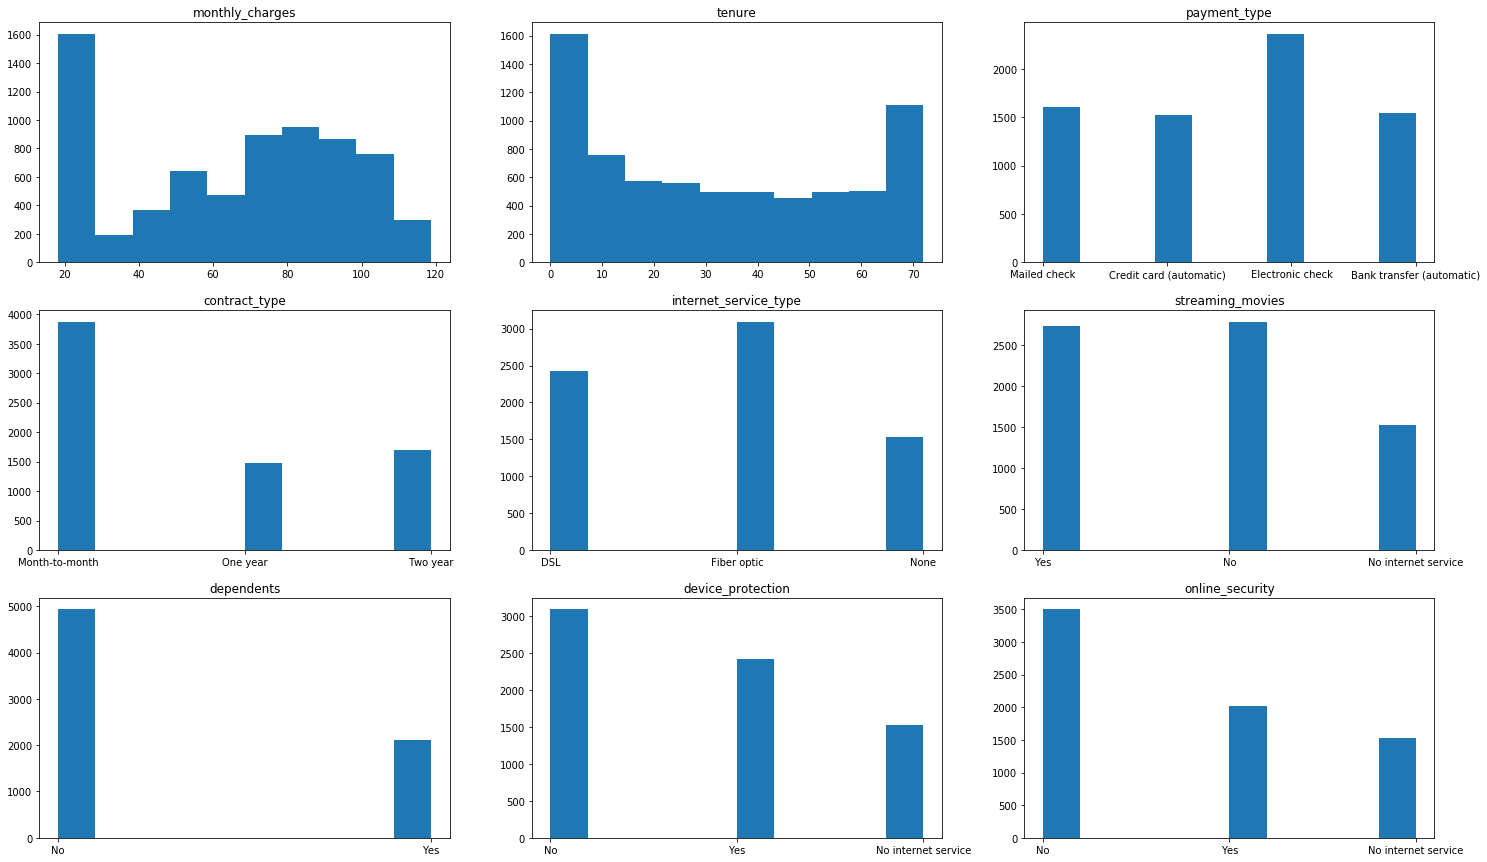

In [10]:
# Plot distribution with subplots of histograms of features

# sets size
plt.subplots(figsize=(25, 15))


plt.subplot(3,3,1);
line1 = plt.hist(df.monthly_charges)
plt.title('monthly_charges');

plt.subplot(3,3,2);
line2 = plt.hist(df.tenure);
plt.title('tenure');

plt.subplot(3,3,3);
line3 = plt.hist(df.payment_type);
plt.title('payment_type');

plt.subplot(3,3,4);
line4 = plt.hist(df.contract_type);
plt.title('contract_type');

plt.subplot(3,3,5);
line1 = plt.hist(df.internet_service_type)
plt.title('internet_service_type');

plt.subplot(3,3,6);
line2 = plt.hist(df.streaming_movies);
plt.title('streaming_movies');

plt.subplot(3,3,7);
line3 = plt.hist(df.dependents);
plt.title('dependents');

plt.subplot(3,3,8);
line4 = plt.hist(df.device_protection);
plt.title('device_protection');

plt.subplot(3,3,9);
line4 = plt.hist(df.online_security);
plt.title('online_security');

# Prepare

In [11]:
train, validate, test = prepare.telco_prep(df)

In [12]:

print(train.shape, validate.shape, test.shape)

(3943, 26) (1691, 26) (1409, 26)


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5670 to 6867
Data columns (total 26 columns):
contract_type_id                 3943 non-null int64
payment_type_id                  3943 non-null int64
customer_id                      3943 non-null object
partner                          3943 non-null int64
dependents                       3943 non-null int64
tenure_months                    3943 non-null int64
phone_service                    3943 non-null int64
multiple_lines                   3943 non-null object
online_backup                    3943 non-null int64
device_protection                3943 non-null int64
streaming_tv                     3943 non-null int64
streaming_movies                 3943 non-null int64
paperless_billing                3943 non-null int64
monthly_charges                  3943 non-null float64
churn                            3943 non-null int64
payment_type                     3943 non-null object
contract_type                    3943

# Exploration

- Does having additional services increase customer loyalty?


- Null Hypothesis: Churn is independent of added services.  


- Alternative Hypothesis: Customers with added services are less likely to churn. 



In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5670 to 6867
Data columns (total 26 columns):
contract_type_id                 3943 non-null int64
payment_type_id                  3943 non-null int64
customer_id                      3943 non-null object
partner                          3943 non-null int64
dependents                       3943 non-null int64
tenure_months                    3943 non-null int64
phone_service                    3943 non-null int64
multiple_lines                   3943 non-null object
online_backup                    3943 non-null int64
device_protection                3943 non-null int64
streaming_tv                     3943 non-null int64
streaming_movies                 3943 non-null int64
paperless_billing                3943 non-null int64
monthly_charges                  3943 non-null float64
churn                            3943 non-null int64
payment_type                     3943 non-null object
contract_type                    3943

In [110]:
train.head(1)

,contract_type_id,payment_type_id,customer_id,partner,dependents,tenure_months,phone_service,multiple_lines,online_backup,device_protection,...,contract_type,internet_service_type,internet_service_type_id_orig,online_security_orig,tech_support_orig,internet_service_type_id_2,internet_service_type_id_3,online_security_1,tech_support_1,tenure_years
5670,1,4,2739-CCZMB,0,1,5,1,No,0,0,...,Month-to-month,None,3,0,0,0,1,0,0,0.42


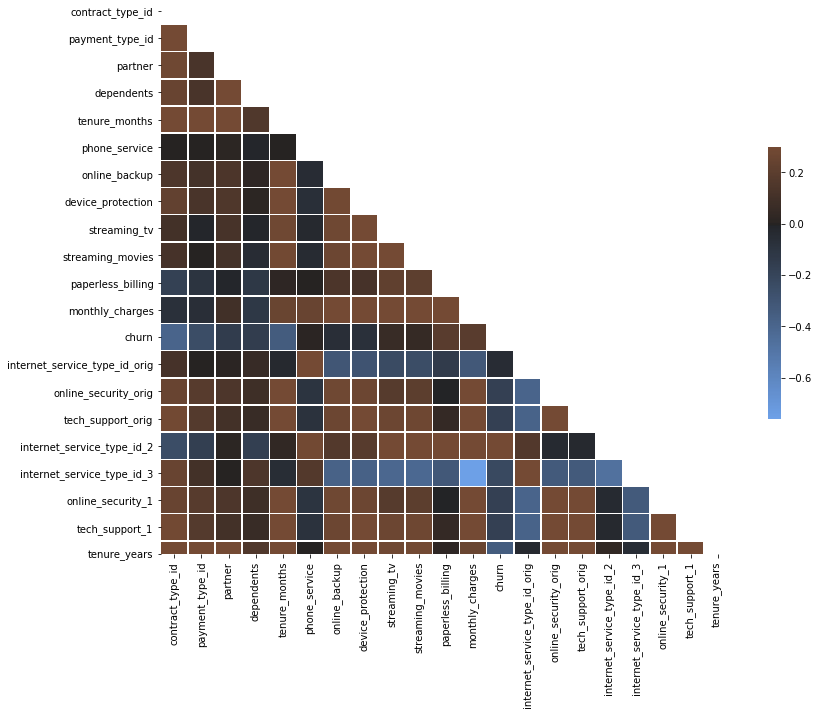

In [15]:
# Correlation heat map
# creating the correlation of each feature against each other
corr = train.corr()

# Generate a mask for the upper triangle, prints out only the bottom triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure, set size
f, ax = plt.subplots(figsize=(13, 10))

# Generate a custom diverging colormap, changing default colors
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
support_streaming_subset = train[['online_security_orig',
       'online_backup', 'device_protection', 'tech_support_orig', 'streaming_tv',
       'streaming_movies', 'churn']]

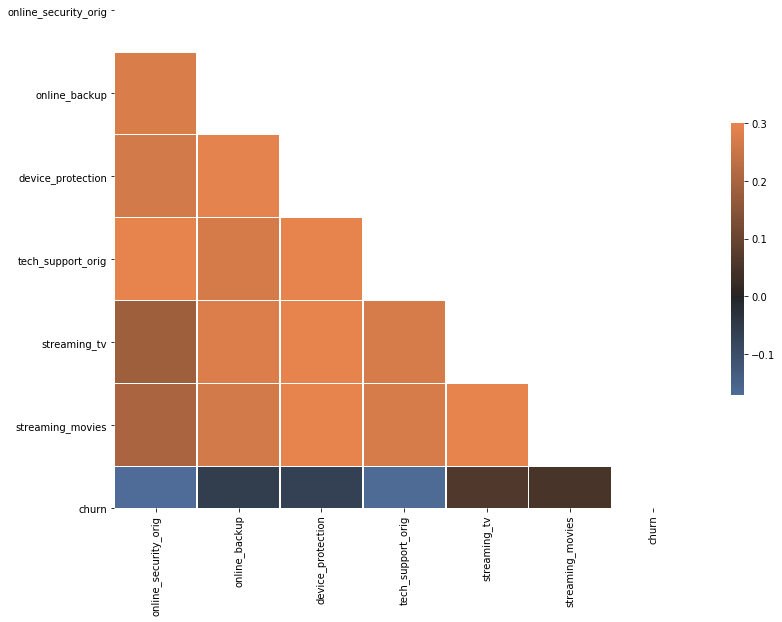

In [17]:
# Correlation heat map
# creating the correlation of each feature against each other
corr = support_streaming_subset.corr()

# Generate a mask for the upper triangle, prints out only the bottom triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure, set size
f, ax = plt.subplots(figsize=(13, 10))

# Generate a custom diverging colormap, changing default colors
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Takeaways from the Heatmap

- I want to look further into which internet_service_type_id strongly correlates with online_security.

- It looks like many of the additional features like online_security, online_backup, device_protection, tech_support, streaming_tv, and streaming_movies have a relationship with internet_service_type_id. 

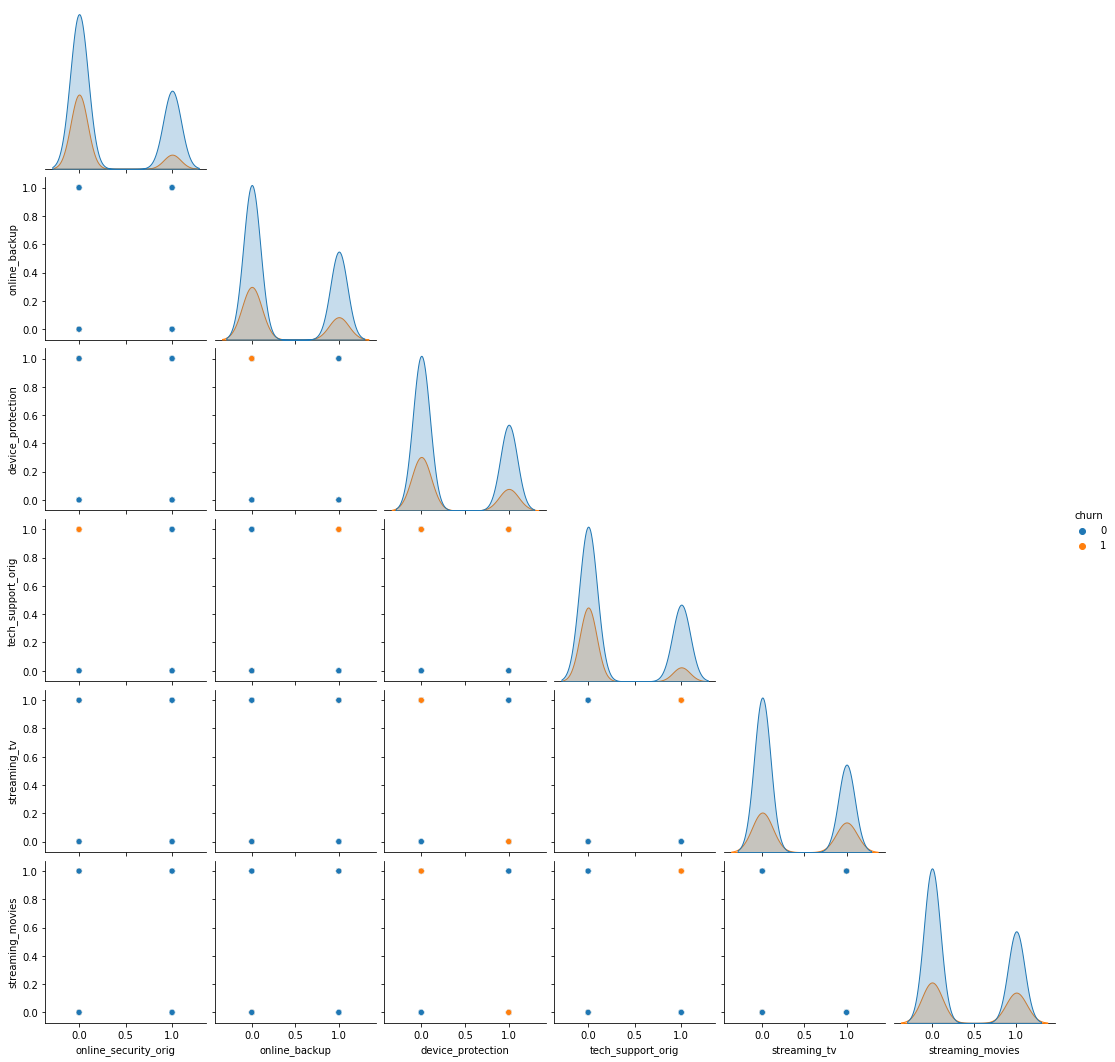

In [18]:
# A quick seaborn pairplot to illustrate some features of interest

sns.pairplot(data=support_streaming_subset, corner=True, hue='churn')
plt.show()

### Takeaways from Pairplot

- I can see here that customers who have online_security, online_backup, device_protection, and/or tech_support churn less often. This may be an area to run some statistical tests.


- It does not look like there is a big difference in churn whether customers subscribe to streaming_tv or streaming_movies services.


- How can I find out if the same customers who have tech_support have other services as well?

In [19]:
# 23% of customers who have online_backup services churn

(train[train.online_backup == 1].churn == 1).mean()

0.2289068231841526

In [20]:
# 74% of customers who have tech_support services also have online_security services.

(train.tech_support_orig == train.online_security_orig).mean()

0.7375095105249809

In [21]:
# 74% of customers who have tech_support services also have online_security services.

((train.tech_support_orig == 1) & (train.online_security_orig == 1)).mean()

0.1559726096880548

In [22]:
# Only 12% of Fiber Customers have tech_support.

((train.tech_support_orig == 1) & (train.internet_service_type == 'Fiber optic')).mean()

0.12072026375855947

In [23]:
# 16% of DSL customers have tech_support.

((train.tech_support_orig == 1) & (train.internet_service_type == 'DSL')).mean()

0.1648490996703018

In [24]:
# 29% of customers have tech_support.

((train.tech_support_orig == 1) & (train.internet_service_type != 'None')).mean()

0.2855693634288613

In [25]:
cat_vars = ['churn', 'online_security_orig', 'tech_support_orig', 'online_backup', 'device_protection']
quant_vars = ['monthly_charges', 'tenure_months']

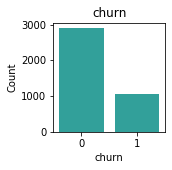

   churn  Count  Percent
0      0   2897    73.47
1      1   1046    26.53
_________________________________________________________________


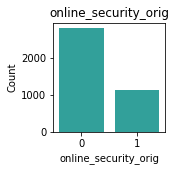

   online_security_orig  Count  Percent
0                     0   2804    71.11
1                     1   1139    28.89
_________________________________________________________________


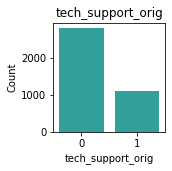

   tech_support_orig  Count  Percent
0                  0   2817    71.44
1                  1   1126    28.56
_________________________________________________________________


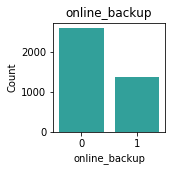

   online_backup  Count  Percent
0              0   2580    65.43
1              1   1363    34.57
_________________________________________________________________


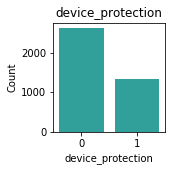

   device_protection  Count  Percent
0                  0   2610    66.19
1                  1   1333    33.81
_________________________________________________________________


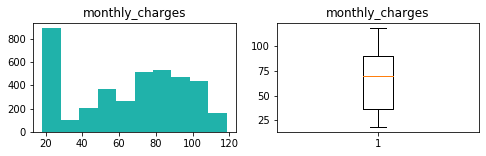

count    3943.000000
mean       64.823497
std        29.942691
min        18.250000
25%        36.350000
50%        70.150000
75%        89.750000
max       118.600000
Name: monthly_charges, dtype: float64


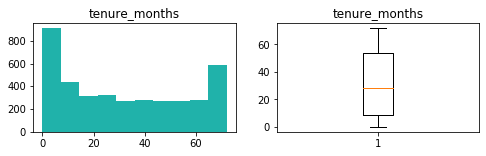

count    3943.000000
mean       31.931017
std        24.365751
min         0.000000
25%         9.000000
50%        28.000000
75%        54.000000
max        72.000000
Name: tenure_months, dtype: float64


In [26]:

explore.explore_univariate(train, cat_vars, quant_vars)

In [27]:
# Run a bivariate test
# First take 'churn' off of the list
cat_vars = cat_vars[1:]

online_security_orig 
_____________________

         chi2       p-value  degrees of freedom
0  114.851907  8.479963e-27                   1

observed:
 churn                    0     1   All
online_security_orig                  
0                     1925   879  2804
1                      972   167  1139
All                   2897  1046  3943

expected:
              0           1
0  2060.154197  743.845803
1   836.845803  302.154197


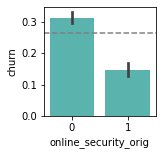


_____________________

tech_support_orig 
_____________________

         chi2       p-value  degrees of freedom
0  111.474188  4.658311e-26                   1

observed:
 churn                 0     1   All
tech_support_orig                  
0                  1937   880  2817
1                   960   166  1126
All                2897  1046  3943

expected:
              0           1
0  2069.705554  747.294446
1   827.294446  298.705554


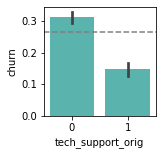


_____________________

online_backup 
_____________________

        chi2   p-value  degrees of freedom
0  13.856071  0.000197                   1

observed:
 churn             0     1   All
online_backup                  
0              1846   734  2580
1              1051   312  1363
All            2897  1046  3943

expected:
              0           1
0  1895.576972  684.423028
1  1001.423028  361.576972


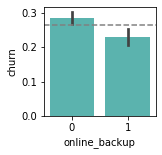


_____________________

device_protection 
_____________________

        chi2   p-value  degrees of freedom
0  16.406735  0.000051                   1

observed:
 churn                 0     1   All
device_protection                  
0                  1864   746  2610
1                  1033   300  1333
All                2897  1046  3943

expected:
              0           1
0  1917.618565  692.381435
1   979.381435  353.618565


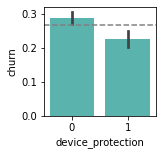


_____________________

monthly_charges 
____________________



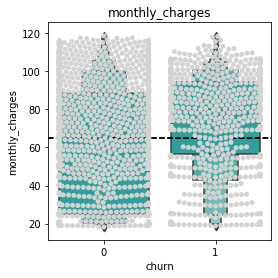

        count       mean        std    min      25%    50%    75%     max
churn                                                                    
0      2897.0  61.413997  30.890138  18.25  25.1500  64.60  88.40  118.60
1      1046.0  74.266444  24.823691  18.85  56.6625  79.65  94.25  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1156450.0, pvalue=6.206014591716352e-30)

____________________

tenure_months 
____________________



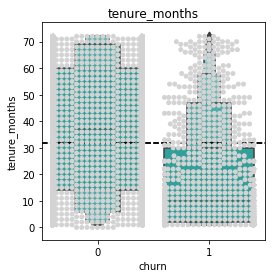

        count       mean        std  min   25%   50%   75%   max
churn                                                           
0      2897.0  36.940283  23.962669  0.0  14.0  37.0  60.0  72.0
1      1046.0  18.057361  19.647335  1.0   2.0  10.0  30.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2225608.5, pvalue=2.4298450761804645e-112)

____________________



In [28]:
# Next, run Maggie's the awesome explore function
explore.explore_bivariate(train, 'churn', cat_vars, quant_vars)

### T-test
- There is a significant difference in what Fiber Optic customers pay depending on if they have tech support or not.


- Fiber customers with tech support pay significantly more than those without, but still have a much lower churn rate.


- It's the same for customers with online_security.

In [112]:
# t-test: Is there a difference between the means of monthly_charges for fiber customers who churn and those who don't? 

fiber_cust = train[train.internet_service_type_id_orig == 2]
fiber_cust.shape

(1740, 26)

In [113]:
alpha = .05

In [114]:
fiber_churn = fiber_cust[fiber_cust.churn == 1]

In [115]:
fiber_churn.monthly_charges.describe()

count    724.000000
mean      88.029696
std       12.067795
min       68.250000
25%       78.287500
50%       86.975000
75%       98.625000
max      118.350000
Name: monthly_charges, dtype: float64

In [116]:
fiber_no_churn = fiber_cust[fiber_cust.churn == 0]

In [117]:
fiber_no_churn.monthly_charges.describe()

count    1016.000000
mean       93.697195
std        12.650196
min        68.600000
25%        84.400000
50%        94.700000
75%       104.100000
max       118.600000
Name: monthly_charges, dtype: float64

In [118]:
t, p = stats.ttest_ind(fiber_churn.monthly_charges, fiber_no_churn.monthly_charges)
print(f't = {t}, p = {p}')
print(f'The p-value is less than the alpha: {p < alpha}')

t = -9.38896585255263, p = 1.8312165792440667e-20
The p-value is less than the alpha: True


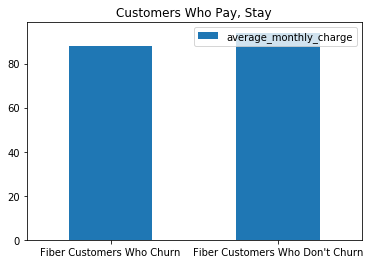

In [121]:
groups = ['Fiber Customers Who Churn', 'Fiber Customers Who Don\'t Churn']
averages = [88, 94]

df = pd.DataFrame({'group' : groups,'average_monthly_charge' : averages})
df.plot.bar(title='Customers Who Pay, Stay')
locs, labels = plt.xticks()
plt.xticks(locs, groups)
plt.xticks(rotation=0)
plt.show()

___

#### Tech Support

In [36]:
# Only 15% of customers who have tech support churn.

(train[train.tech_support_orig == 1].churn == 1).mean()

0.14742451154529307

In [37]:
# as opposed to 31% of customers who don't have tech_support churn.

(train[train.tech_support_orig == 0].churn == 1).mean()

0.3123890663826766

In [38]:
# t-test: Is there a difference between the means of monthly_charges for fiber customers who have tech support and those who don't? 

fiber_ts_cust = train[(train.internet_service_type_id_orig == 2) & (train.tech_support_orig == 1)]
fiber_ts_cust.shape

(476, 26)

In [39]:
fiber_nts_cust = train[(train.internet_service_type_id_orig == 2) & (train.tech_support_orig == 0)]
fiber_nts_cust.shape

(1264, 26)

In [40]:
# Fiber customers with tech support pay significantly more than those without, but still have a much lower churn rate.

fiber_ts_cust.monthly_charges.describe()

count    476.000000
mean     101.032773
std       10.622145
min       73.850000
25%       93.975000
50%      103.850000
75%      109.612500
max      118.600000
Name: monthly_charges, dtype: float64

In [41]:
fiber_nts_cust.monthly_charges.describe()

count    1264.000000
mean       87.688489
std        11.468936
min        68.250000
25%        78.450000
50%        88.100000
75%        97.012500
max       113.200000
Name: monthly_charges, dtype: float64

In [42]:
t, p = stats.ttest_ind(fiber_ts_cust.monthly_charges, fiber_nts_cust.monthly_charges)
print(f't = {t}, p = {p}')
print(f'The p-value is less than the alpha: {p < alpha}')

t = 22.069017804271706, p = 2.3838240499682178e-95
The p-value is less than the alpha: True


In [43]:
pd.crosstab(train['tech_support_orig'], train.internet_service_type, values=train.churn, aggfunc='mean')

internet_service_type,DSL,Fiber optic,None
tech_support_orig,,,
0,0.275524,0.490506,0.075179
1,0.095385,0.218487,NaN


___

#### Online Security

In [44]:
# Only 15 % of customers who have online_security churn.

(train[train.online_security_orig == 1].churn == 1).mean()

0.1466198419666374

In [45]:
# as opposed to 31% of customers who don't have online_security churn.

(train[train.online_security_orig == 0].churn == 1).mean()

0.31348074179743224

In [46]:
fiber_is_cust = train[(train.internet_service_type_id_orig == 2) & (train.online_security_orig == 1)]
fiber_nis_cust = train[(train.internet_service_type_id_orig == 2) & (train.online_security_orig == 0)]

In [47]:
fiber_is_cust.monthly_charges.describe()

count    474.000000
mean      99.167405
std       11.582250
min       73.600000
25%       90.650000
50%      100.475000
75%      108.987500
max      118.600000
Name: monthly_charges, dtype: float64

In [48]:
fiber_nis_cust.monthly_charges.describe()

count    1266.000000
mean       88.407978
std        11.859575
min        68.250000
25%        79.162500
50%        89.100000
75%        98.837500
max       113.150000
Name: monthly_charges, dtype: float64

In [49]:
t, p = stats.ttest_ind(fiber_is_cust.monthly_charges, fiber_nis_cust.monthly_charges)
print(f't = {t}, p = {p}')
print(f'The p-value is less than the alpha: {p < alpha}')

t = 16.955097904267998, p = 8.622685229002446e-60
The p-value is less than the alpha: True


In [50]:
pd.crosstab(train['online_security_orig'], train.internet_service_type, values=train.churn, aggfunc='mean')

internet_service_type,DSL,Fiber optic,None
online_security_orig,,,
0,0.274286,0.492891,0.075179
1,0.100752,0.210970,NaN


# Modeling & Evaluating

- By predicting that no customers will churn, I am accurate 73% of the time. This is the baseline metric that I need to beat for a model to hold any value.

In [51]:
# Set my baseline accuracy.

train.churn.value_counts(normalize=True)

0    0.73472
1    0.26528
Name: churn, dtype: float64

In [52]:
train.head(1)

,contract_type_id,payment_type_id,customer_id,partner,dependents,tenure_months,phone_service,multiple_lines,online_backup,device_protection,...,contract_type,internet_service_type,internet_service_type_id_orig,online_security_orig,tech_support_orig,internet_service_type_id_2,internet_service_type_id_3,online_security_1,tech_support_1,tenure_years
5670,1,4,2739-CCZMB,0,1,5,1,No,0,0,...,Month-to-month,None,3,0,0,0,1,0,0,0.42


## Define X and y 



___

In [53]:
features = ['internet_service_type_id_orig', 'tenure_months', 'streaming_tv','streaming_movies', 'monthly_charges', 'online_security_orig', 'online_backup', 'device_protection', 'tech_support_orig']

In [54]:
X_train = train[features]
y_train = train[['churn']]

X_validate = validate[features]
y_validate = validate[['churn']]

X_test = test[features]
y_test = test[['churn']]

### Logistic Regression with Numeric Features - Model 1

In [55]:
# Create a Logistic Regression model.

logit1 = LogisticRegression(random_state=123)

In [56]:
# Fit the model

logit1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# Print classification report for Logit1 train.

print(classification_report(y_true=train.churn, y_pred=logit1.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2897
           1       0.63      0.48      0.55      1046

    accuracy                           0.79      3943
   macro avg       0.73      0.69      0.71      3943
weighted avg       0.78      0.79      0.78      3943



In [58]:
# Print classification report for Logit1 validate.

print(classification_report(y_true=validate.churn, y_pred=logit1.predict(X_validate)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1242
           1       0.66      0.49      0.56       449

    accuracy                           0.80      1691
   macro avg       0.75      0.70      0.72      1691
weighted avg       0.79      0.80      0.79      1691



### Takeaways 

Feature Importance - Looking at this quick and dirty feature list and model weights from my first LR model, I have learned the following things:


- By just feeding in the numeric features from my dataframe, this first LR model is already beating my baseline accuracy of 73%.
    
    
- The model is not overfit because validate is actually performing just slightly better in my model.
    
    
- I will go back to do some exploration and possibly create dummy variables for some of my more important binary features like `online_security` and `tech_support`. Then I will run one more LR to see if I can beat this model.

## Logistic Regression with Encoded Binary Features - Model 2

- After more exploration and testing of some of the features that my first LR model weighted more heavily, I'm going to try a LR again.


- This time, I have created dummy variables from my binary features to see if it improves my LR model.

In [59]:
features2 = ['tenure_months', 'monthly_charges', 'internet_service_type_id_2','internet_service_type_id_3', 'online_security_1', 'tech_support_1']

In [60]:
X_train = train[features2]
y_train = train[['churn']]

X_validate = validate[features2]
y_validate = validate[['churn']]

X_test = test[features2]
y_test = test[['churn']]

In [61]:
X_train.shape

(3943, 6)

In [62]:
logit2 = LogisticRegression(random_state=123)
logit2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
weights = logit2.coef_.flatten()

In [64]:
pd.DataFrame(weights, features2).reset_index().rename(columns={'index': 'feature', 0: 'weight'})

,feature,weight
0,tenure_months,-0.040815
1,monthly_charges,0.009892
2,internet_service_type_id_2,0.818076
3,internet_service_type_id_3,-1.292532
4,online_security_1,-0.613153
5,tech_support_1,-0.633782


In [65]:
# Print classification report for Logit2 train.

print(classification_report(y_true=train.churn, y_pred=logit2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2897
           1       0.65      0.46      0.54      1046

    accuracy                           0.79      3943
   macro avg       0.74      0.68      0.70      3943
weighted avg       0.78      0.79      0.78      3943



In [66]:
# Print classification report for Logit2 validate.

print(classification_report(y_true=validate.churn, y_pred=logit2.predict(X_validate)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1242
           1       0.66      0.44      0.53       449

    accuracy                           0.79      1691
   macro avg       0.74      0.68      0.70      1691
weighted avg       0.78      0.79      0.78      1691



### Takeaways:

- The second LR model which used the dummy variables for `internet_service_type`,  `online_security`,and `tech_support` improved by less than one accuracy point, however at 79% accuracy, both LR models are beating my baseline prediction for churn.


- Both LR models are also not overfit shown by their performance on the validate dataset.


- However, the recall score for both models is very low, with the first LR model coming in at 48% and the second, with dummy vars, coming in at 46% for the positive class.

## Decision Tree - Model 3

In [67]:
# Generate a Decision Tree model with the max_depth argument is set to 5

clf = DecisionTreeClassifier(max_depth=5, random_state=123)

In [68]:
# Slightly tweaked my features, adding `contract_type_id`

features1 = ['tenure_months', 'monthly_charges', 'internet_service_type_id_2','internet_service_type_id_3', 'contract_type_id', 'tech_support_1']

In [69]:
# Adjusted the train, validate, and test to the tweaked features

X_train = train[features1]
y_train = train[['churn']]

X_validate = validate[features1]
y_validate = validate[['churn']]

X_test = test[features1]
y_test = test[['churn']]

In [70]:
# Fit the model on the training data

clf = clf.fit(X_train, y_train)

In [71]:
# Generate a set of predictions using this trained model

y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 1, 0, 0, 0])

In [72]:
# Estimate the probabilities for each class

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.89880952, 0.10119048],
       [0.31      , 0.69      ],
       [0.86614173, 0.13385827],
       [1.        , 0.        ],
       [0.60932945, 0.39067055]])

In [73]:
# Evaluate the model 

print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.802


In [74]:
# Print a classification report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2897
           1       0.67      0.51      0.58      1046

    accuracy                           0.80      3943
   macro avg       0.75      0.71      0.72      3943
weighted avg       0.79      0.80      0.79      3943



In [75]:
# Evaluate this model on out-of-sample data

print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.788


In [76]:
# Use the classification model trained on train data to make predictions on validate data

y_pred_val = clf.predict(X_validate)

In [77]:
# Compare actual y values from validate to predictions based on X_validate

print(classification_report(y_validate, y_pred_val))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1242
           1       0.64      0.45      0.53       449

    accuracy                           0.79      1691
   macro avg       0.73      0.68      0.70      1691
weighted avg       0.77      0.79      0.77      1691



### Takeaways:

- The Decision Tree model performed nearly identically to my LR models with an 80% accuracy on train and a 79% accuracy on validate

- The recall on my train was better, at 51%, but dropped off to 45% on my validate

---

## Random Forest - Model 4

In [78]:
# Generate a RAndom Forest model with the max_depth argument is set to 4

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=4,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [79]:
# Fit the model on the training data 

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [81]:
# Evaluate the weight of each feature.

print(rf.feature_importances_)

[0.31689737 0.13304363 0.16118118 0.05395441 0.29450961 0.0404138 ]


In [82]:
# Make my prediction and estimate probability for Random Forest Train

y_pred_rf = rf.predict(X_train)
y_pred_proba_rf = rf.predict_proba(X_train)

In [83]:
# Print classification report

print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2897
           1       0.69      0.45      0.54      1046

    accuracy                           0.80      3943
   macro avg       0.76      0.69      0.71      3943
weighted avg       0.79      0.80      0.78      3943



In [84]:
# Make my prediction and estimate probability for Random Forest Validate

y_pred_rf_val = rf.predict(X_validate)
y_pred_proba_rf_val = rf.predict_proba(X_validate)

In [85]:
# Print my validation classification report

print(classification_report(y_validate, y_pred_rf_val))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1242
           1       0.71      0.42      0.53       449

    accuracy                           0.80      1691
   macro avg       0.76      0.68      0.70      1691
weighted avg       0.79      0.80      0.78      1691



## Takeaways

- Accuracy was on par with previous models

- As the recall for churn was at 45% for both test and validate, this was my weakest performer

## Test

- All four of my models performed at roughly 80% accuracy

- While my Decision Tree model had a test recall of 51%, it dropped off to 45% on validate, bringing it right in line with my other models

- None of my models were wildly overfit, so I chose to test on the best fit, the first LR model

In [86]:
features = ['internet_service_type_id_orig', 'tenure_months', 'streaming_tv','streaming_movies', 'monthly_charges', 'online_security_orig', 'online_backup', 'device_protection', 'tech_support_orig']

In [87]:
X_train = train[features]
y_train = train[['churn']]

X_validate = validate[features]
y_validate = validate[['churn']]

X_test = test[features]
y_test = test[['churn']]

In [88]:
# Make sure the test data propotions look correct

print(X_test.shape, y_test.shape)

(1409, 9) (1409, 1)


### Logistic Regression with Numeric Features - Model 1

In [89]:
# The test LR model did as well on accuracy and improved on recall by 5%

print(classification_report(y_true=y_test, y_pred=logit1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



## Create CSV

In [90]:
df.head(1)

,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type,internet_service_type_id_orig,online_security_orig,tech_support_orig
0,1,1,2,0003-MKNFE,Male,0,0,0,9,1,...,0,59.9,542.4,0,Mailed check,Month-to-month,DSL,1,0,0


In [92]:
# Prepare df without splitting
df = acquire.get_telco_data()
df = prepare.telco_df_prep(df)

In [93]:
X = df[['internet_service_type_id_orig', 'tenure_months', 'streaming_tv','streaming_movies', 'monthly_charges', 'online_security_orig', 'online_backup', 'device_protection', 'tech_support_orig']]

In [94]:
# Add a column for the preditions on the entire, prepped df.

df['prediction'] = logit1.predict(X)
df.head(1)

,contract_type_id,payment_type_id,customer_id,partner,dependents,tenure_months,phone_service,multiple_lines,online_backup,device_protection,...,internet_service_type,internet_service_type_id_orig,online_security_orig,tech_support_orig,internet_service_type_id_2,internet_service_type_id_3,online_security_1,tech_support_1,tenure_years,prediction
0,1,2,0003-MKNFE,0,0,9,1,Yes,0,0,...,DSL,1,0,0,0,0,0,0,0.75,1


In [100]:
# Get probability for churn, 1, and concat back onto our df.

df_prob = pd.DataFrame(logit1.predict_proba(X))
df_prob = df_prob.drop(0,axis=1)
df_prob.round(3)
df = pd.concat([df,df_prob],axis=1)
df = df.rename(columns={1:'proba_of_churn'})

In [102]:
csv_df = df[['customer_id', 'prediction', 'proba_of_churn']]
csv_df.head()

,customer_id,prediction,proba_of_churn
0,0003-MKNFE,1,0.543120
1,0013-MHZWF,0,0.418019
2,0015-UOCOJ,0,0.289727
3,0023-HGHWL,0,0.323224
4,0032-PGELS,0,0.213505


In [103]:
# Write df to csv file.

#csv_df.to_csv('telco_predictions.csv')